In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [335]:
store_data_train = pd.read_csv('store_data_time_series_for/train.csv')
store_data_test = pd.read_csv('store_data_time_series_for/test.csv')
store_data_stores = pd.read_csv('store_data_time_series_for/stores.csv')
store_data_holidays_events = pd.read_csv('store_data_time_series_for/holidays_events.csv')
store_data_transactions = pd.read_csv('store_data_time_series_for/transactions.csv')

In [336]:
store_data_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [337]:
store_data_train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [338]:
store_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [339]:
store_data_train.shape

(3000888, 6)

In [340]:
train_data_start = store_data_train['date'].min()
train_data_end = store_data_train['date'].max()

# Generate a date range 
date_range = pd.date_range(start=train_data_start, end=train_data_end)

# Use the difference between the date_range and the unique dates in the sales data to find missing dates
missing_dates = date_range.difference(store_data_train['date'])

print("Missing dates:")
print(missing_dates)

Missing dates:
DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)


In [341]:
store_data_test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [342]:
store_data_test.isnull().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

In [343]:
store_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [344]:
store_data_test.shape

(28512, 5)

In [345]:
store_data_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [346]:
store_data_stores.isnull().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [347]:
store_data_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [348]:
store_data_stores.shape

(54, 5)

In [349]:
store_data_holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [350]:
store_data_holidays_events['type'].value_counts()

type
Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: count, dtype: int64

In [351]:
store_data_holidays_events.isnull().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [352]:
store_data_holidays_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [353]:
store_data_holidays_events.shape

(350, 6)

In [354]:
store_data_transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [355]:
store_data_transactions['store_nbr'].value_counts().head()

store_nbr
39    1678
38    1678
26    1678
31    1678
33    1678
Name: count, dtype: int64

In [356]:
store_data_transactions.isnull().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

In [357]:
store_data_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [358]:
store_data_transactions.shape

(83488, 3)

In [359]:
#As the data set is to large we need to take a sample data
date_mask = (store_data_train['date'] >= '2017-07-15') & (store_data_train['date'] <= '2017-08-15')

Salesdf = store_data_train[date_mask]

#Print the size
len(Salesdf)

57024

In [360]:
Salesdf.head()

,id,date,store_nbr,family,sales,onpromotion
2943864,2943864,2017-07-15,1,AUTOMOTIVE,6.0,0
2943865,2943865,2017-07-15,1,BABY CARE,0.0,0
2943866,2943866,2017-07-15,1,BEAUTY,5.0,1
2943867,2943867,2017-07-15,1,BEVERAGES,2183.0,38
2943868,2943868,2017-07-15,1,BOOKS,0.0,0


In [361]:
store_data_oil = pd.read_csv('store_data_time_series_for/oil.csv')

In [362]:
import datetime
from datetime import date, timedelta

#add missing date
min_oil_date = min(Salesdf.date)
max_oil_date = max(Salesdf.date)

calendar = []

d1 = datetime.datetime.strptime(min_oil_date, '%Y-%m-%d')  # start date
d2 = datetime.datetime.strptime(max_oil_date, '%Y-%m-%d')  # end date

delta = d2 - d1         # timedelta

for i in range(delta.days + 1):
    calendar.append(datetime.date.strftime(d1 + timedelta(days=i), '%Y-%m-%d'))

calendar = pd.DataFrame({'date':calendar})

store_data_oil = calendar.merge(store_data_oil, left_on='date', right_on='date', how='left')

In [363]:
store_data_oil.head()

,date,dcoilwtico
0,2017-07-15,NaN
1,2017-07-16,NaN
2,2017-07-17,46.02
3,2017-07-18,46.40
4,2017-07-19,47.10


In [364]:
store_data_oil.shape

(32, 2)

In [365]:
store_data_oil.isnull().sum()

date           0
dcoilwtico    10
dtype: int64

In [366]:
#find the index that contain null value
na_index_oil = store_data_oil[store_data_oil['dcoilwtico'].isnull() == True].index.values
na_index_oil

array([ 0,  1,  7,  8, 14, 15, 21, 22, 28, 29], dtype=int64)

In [367]:
#Rename the column
store_data_oil.rename(columns={'dcoilwtico': 'oil_price'}, inplace=True)

In [368]:
#Fill the null values using the method bfill
store_data_oil.fillna(method='bfill', inplace=True)

In [369]:
store_data_oil.isnull().sum()

date         0
oil_price    0
dtype: int64

In [370]:
store_data_oil.head()

,date,oil_price
0,2017-07-15,46.02
1,2017-07-16,46.02
2,2017-07-17,46.02
3,2017-07-18,46.40
4,2017-07-19,47.10


In [371]:
store_data_oil.tail()

,date,oil_price
27,2017-08-11,48.81
28,2017-08-12,47.59
29,2017-08-13,47.59
30,2017-08-14,47.59
31,2017-08-15,47.57


In [372]:
rows = store_data_oil.loc[[0,  1,  7,  8, 14, 15, 21, 22, 28, 29]]
rows

,date,oil_price
0,2017-07-15,46.02
1,2017-07-16,46.02
7,2017-07-22,46.21
8,2017-07-23,46.21
14,2017-07-29,50.21
15,2017-07-30,50.21
21,2017-08-05,49.37
22,2017-08-06,49.37
28,2017-08-12,47.59
29,2017-08-13,47.59


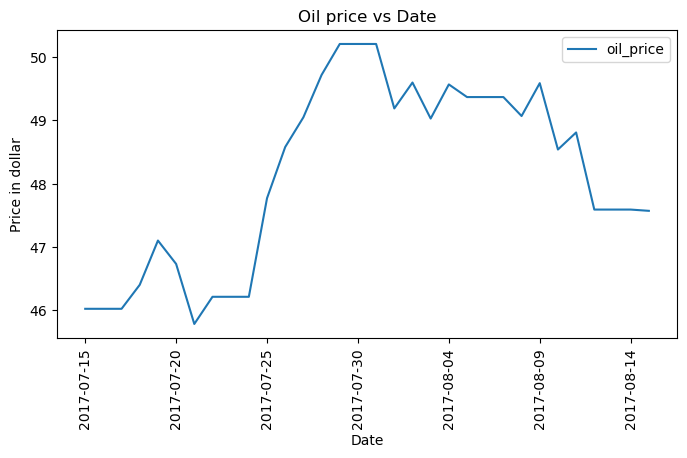

In [373]:
#Plot the oil values
plt.figure(figsize=(8,4))
oil_plot = store_data_oil['oil_price'].copy()
oil_plot.index = store_data_oil['date'].copy()
oil_plot.plot()
plt.xlabel('Date')
plt.ylabel('Price in dollar')
plt.xticks(rotation=90)
plt.legend()
plt.title('Oil price vs Date')
plt.show()

In [374]:
store_data_oil['oil_normalized'] = (store_data_oil['oil_price'] - store_data_oil['oil_price'].min()) / (store_data_oil['oil_price'].max() - store_data_oil['oil_price'].min())
store_data_oil.head()

,date,oil_price,oil_normalized
0,2017-07-15,46.02,0.054176
1,2017-07-16,46.02,0.054176
2,2017-07-17,46.02,0.054176
3,2017-07-18,46.40,0.139955
4,2017-07-19,47.10,0.297968


In [375]:
Salesdf.head()

,id,date,store_nbr,family,sales,onpromotion
2943864,2943864,2017-07-15,1,AUTOMOTIVE,6.0,0
2943865,2943865,2017-07-15,1,BABY CARE,0.0,0
2943866,2943866,2017-07-15,1,BEAUTY,5.0,1
2943867,2943867,2017-07-15,1,BEVERAGES,2183.0,38
2943868,2943868,2017-07-15,1,BOOKS,0.0,0


In [376]:
#Now merge train data with stores, items, holidays, transactions and oil data
Salesdf = Salesdf.drop('id', axis = 1)
Salesdf = Salesdf.merge(store_data_stores, left_on='store_nbr', right_on='store_nbr', how='left')
Salesdf = Salesdf.merge(store_data_holidays_events, left_on='date', right_on='date', how='left')
Salesdf = Salesdf.merge(store_data_oil, left_on='date', right_on='date', how='left')
Salesdf = Salesdf.merge(store_data_transactions, on=["date", 'store_nbr'], how='left')

In [377]:
Salesdf.head()

,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred,oil_price,oil_normalized,transactions
0,2017-07-15,1,AUTOMOTIVE,6.0,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,46.02,0.054176,1338
1,2017-07-15,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,46.02,0.054176,1338
2,2017-07-15,1,BEAUTY,5.0,1,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,46.02,0.054176,1338
3,2017-07-15,1,BEVERAGES,2183.0,38,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,46.02,0.054176,1338
4,2017-07-15,1,BOOKS,0.0,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,46.02,0.054176,1338


In [378]:
Salesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57024 entries, 0 to 57023
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            57024 non-null  object 
 1   store_nbr       57024 non-null  int64  
 2   family          57024 non-null  object 
 3   sales           57024 non-null  float64
 4   onpromotion     57024 non-null  int64  
 5   city            57024 non-null  object 
 6   state           57024 non-null  object 
 7   type_x          57024 non-null  object 
 8   cluster         57024 non-null  int64  
 9   type_y          12474 non-null  object 
 10  locale          12474 non-null  object 
 11  locale_name     12474 non-null  object 
 12  description     12474 non-null  object 
 13  transferred     12474 non-null  object 
 14  oil_price       57024 non-null  float64
 15  oil_normalized  57024 non-null  float64
 16  transactions    57024 non-null  int64  
dtypes: float64(3), int64(4), object

In [379]:
Salesdf.isnull().sum().sort_values(ascending=False)

type_y            44550
transferred       44550
description       44550
locale_name       44550
locale            44550
date                  0
oil_normalized        0
oil_price             0
cluster               0
store_nbr             0
type_x                0
state                 0
city                  0
onpromotion           0
sales                 0
family                0
transactions          0
dtype: int64

In [380]:
Salesdf.shape

(57024, 17)

In [381]:
Salesdf.describe()

,store_nbr,sales,onpromotion,cluster,oil_price,oil_normalized,transactions
count,57024.000000,57024.000000,57024.000000,57024.000000,57024.000000,57024.000000,57024.000000
mean,27.500000,474.452996,6.308063,8.481481,48.134375,0.531462,1647.279514
std,15.585921,1288.313972,16.834848,4.649775,1.460449,0.329673,915.549247
min,1.000000,0.000000,0.000000,1.000000,45.780000,0.000000,416.000000
25%,14.000000,4.000000,0.000000,4.000000,46.647500,0.195824,1025.750000
50%,27.500000,29.000000,0.000000,8.500000,48.560000,0.627540,1385.500000
75%,41.000000,279.000000,6.000000,13.000000,49.370000,0.810384,1963.000000
max,54.000000,18340.000000,519.000000,17.000000,50.210000,1.000000,5294.000000


In [382]:
Salesdf.describe(include='O')

,date,family,city,state,type_x,type_y,locale,locale_name,description,transferred
count,57024,57024,57024,57024,57024,12474,12474,12474,12474,12474
unique,32,33,22,16,5,3,2,5,7,2
top,2017-07-15,AUTOMOTIVE,Quito,Pichincha,D,Holiday,Local,Guayaquil,Cantonizacion de Cayambe,False
freq,1782,1728,19008,20064,19008,7128,8910,3564,1782,10692


In [383]:
Salesdf.sample(5)

,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred,oil_price,oil_normalized,transactions
32948,2017-08-02,33,HARDWARE,1.000,0,Quevedo,Los Rios,C,3,NaN,NaN,NaN,NaN,NaN,49.60,0.862302,912
33532,2017-08-02,5,BOOKS,0.000,0,Santo Domingo,Santo Domingo de los Tsachilas,D,4,NaN,NaN,NaN,NaN,NaN,49.60,0.862302,1411
9057,2017-07-20,13,HOME AND KITCHEN I,12.000,1,Latacunga,Cotopaxi,C,15,NaN,NaN,NaN,NaN,NaN,46.73,0.214447,834
17466,2017-07-24,49,DELI,438.808,16,Quito,Pichincha,A,11,Additional,Local,Guayaquil,Fundacion de Guayaquil-1,False,46.21,0.097065,2752
50454,2017-08-12,24,PRODUCE,3206.822,10,Guayaquil,Guayas,D,1,NaN,NaN,NaN,NaN,NaN,47.59,0.408578,1943


In [384]:
Salesdf['store_nbr'].value_counts().sort_values(ascending=True).head()

store_nbr
1     1056
32    1056
11    1056
12    1056
13    1056
Name: count, dtype: int64

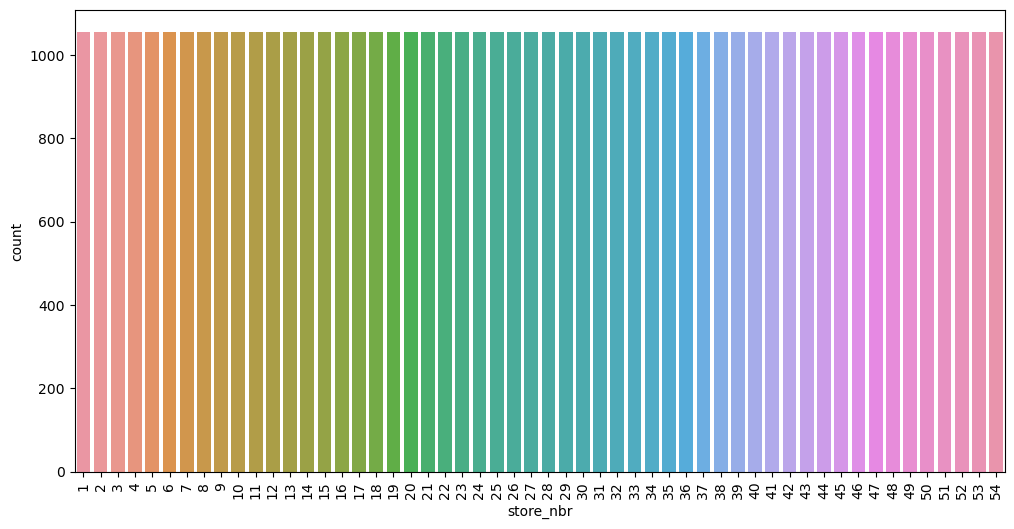

In [385]:
plt.figure(figsize=(12,6))
sns.countplot(x='store_nbr', data=Salesdf);
plt.xticks(rotation=90)
plt.show()

In [386]:
Salesdf['family'].value_counts().head()

family
AUTOMOTIVE                    1728
HOME APPLIANCES               1728
SCHOOL AND OFFICE SUPPLIES    1728
PRODUCE                       1728
PREPARED FOODS                1728
Name: count, dtype: int64

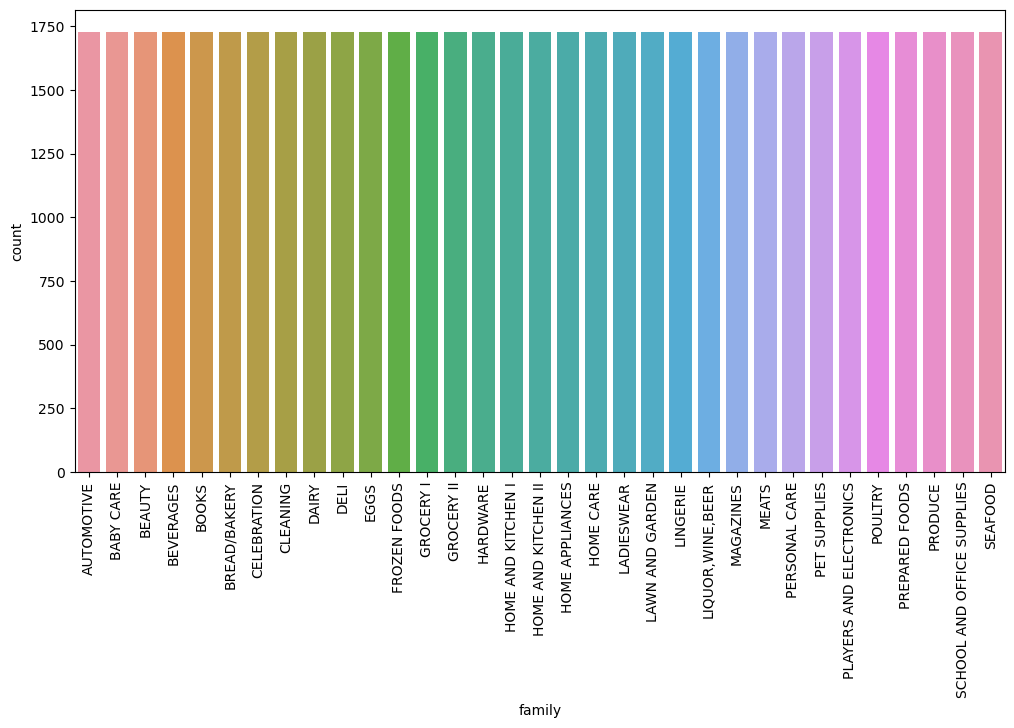

In [387]:
plt.figure(figsize=(12,6))
sns.countplot(x='family', data=Salesdf)
plt.xticks(rotation=90)
plt.show()

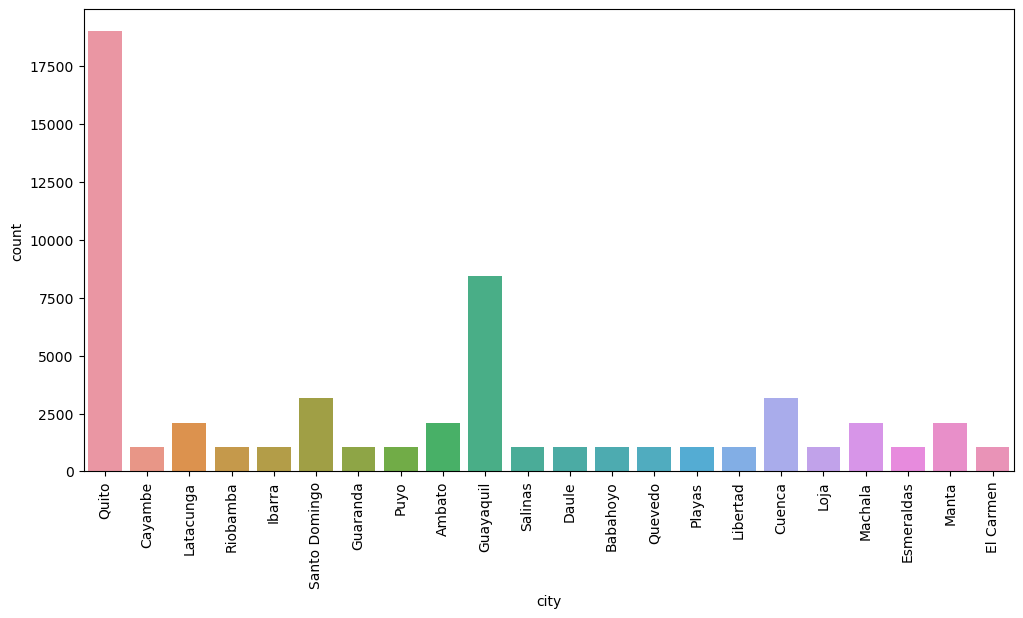

In [388]:
plt.figure(figsize=(12,6))
sns.countplot(x='city', data=Salesdf);
plt.xticks(rotation=90)
plt.show()

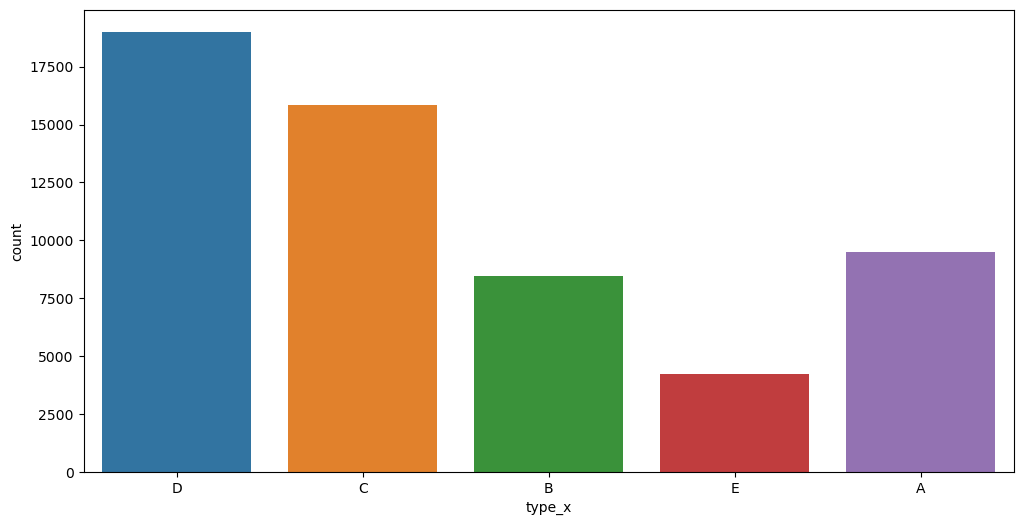

In [389]:
plt.figure(figsize=(12,6))
sns.countplot(x='type_x', data=Salesdf);
plt.show()

In [390]:
Salesdf['type_y'].value_counts()

type_y
Holiday       7128
Additional    3564
Transfer      1782
Name: count, dtype: int64

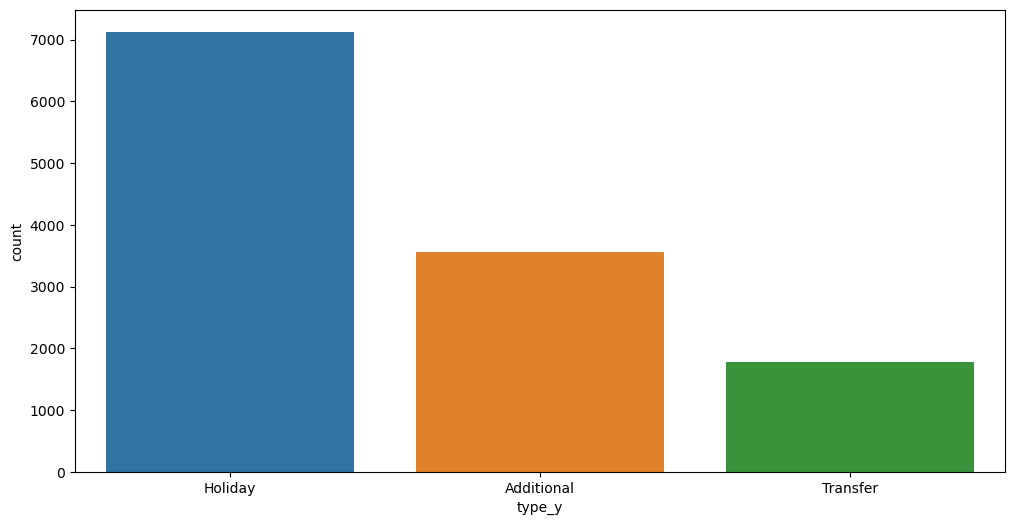

In [391]:
plt.figure(figsize=(12,6))
sns.countplot(x='type_y', data=Salesdf)
plt.show()

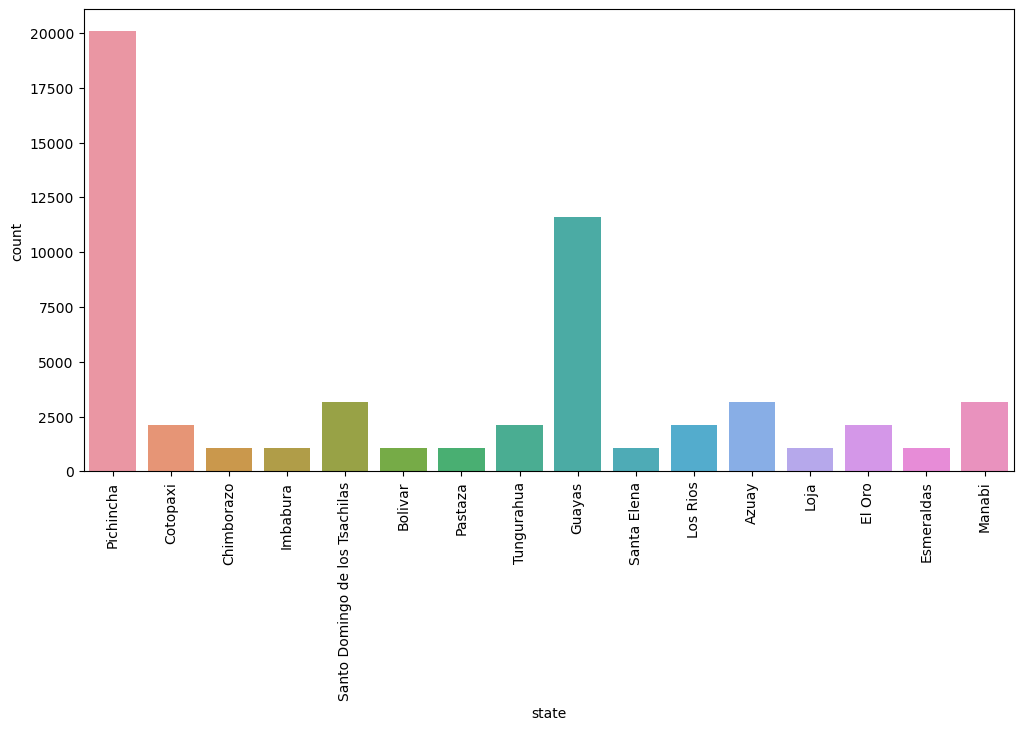

In [392]:
plt.figure(figsize=(12,6))
sns.countplot(x='state', data=Salesdf)
plt.xticks(rotation=90)
plt.show()


In [393]:
avg_sales= Salesdf.groupby('date').sales.mean()

In [394]:
avg_sales.head()

date
2017-07-15    543.814324
2017-07-16    617.734960
2017-07-17    459.217465
2017-07-18    409.727109
2017-07-19    430.964522
Name: sales, dtype: float64

In [395]:
import seaborn as sns

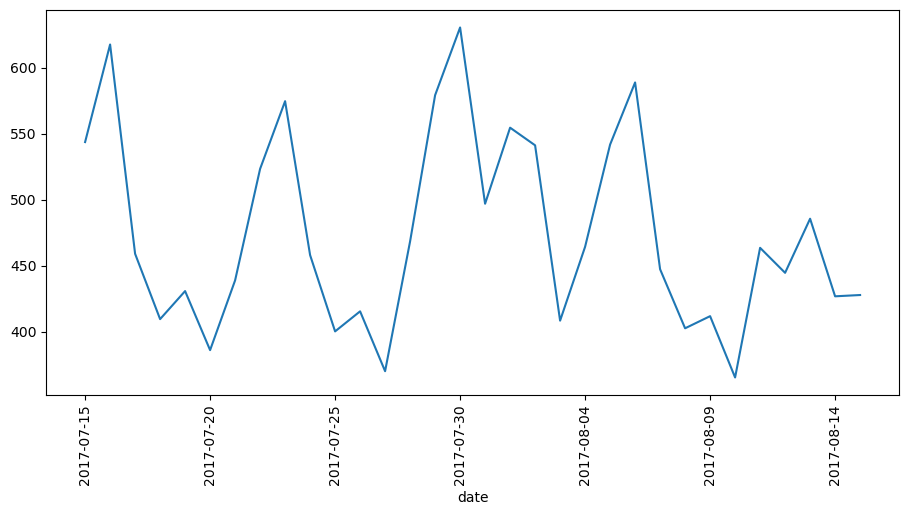

In [396]:
avg_sales.plot(figsize=(11, 5), x='date', y='sales')
plt.xticks(rotation=90)
plt.show()

In [397]:
Salesdf['transferred'].value_counts()

transferred
False    10692
True      1782
Name: count, dtype: int64

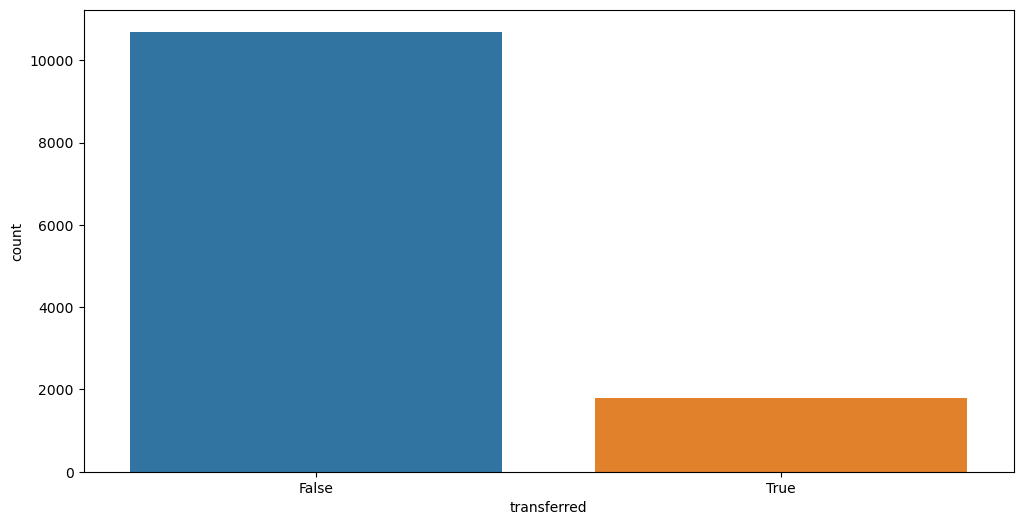

In [398]:
plt.figure(figsize=(12,6))
sns.countplot(x='transferred', data=Salesdf)
plt.show()

In [399]:
#Select the date, days, week, month,Year
Salesdf['date'] = pd.to_datetime(Salesdf['date'], format = "%Y-%m-%d")
Salesdf['day_of_week'] = Salesdf.date.dt.dayofweek
Salesdf['day_of_year'] = Salesdf.date.dt.dayofyear
Salesdf['day_of_month'] = Salesdf.date.dt.day
Salesdf['year'] = Salesdf.date.dt.year
Salesdf['month'] = Salesdf.date.dt.month

In [400]:
Salesdf.head()

,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,type_y,...,description,transferred,oil_price,oil_normalized,transactions,day_of_week,day_of_year,day_of_month,year,month
0,2017-07-15,1,AUTOMOTIVE,6.0,0,Quito,Pichincha,D,13,NaN,...,NaN,NaN,46.02,0.054176,1338,5,196,15,2017,7
1,2017-07-15,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,NaN,...,NaN,NaN,46.02,0.054176,1338,5,196,15,2017,7
2,2017-07-15,1,BEAUTY,5.0,1,Quito,Pichincha,D,13,NaN,...,NaN,NaN,46.02,0.054176,1338,5,196,15,2017,7
3,2017-07-15,1,BEVERAGES,2183.0,38,Quito,Pichincha,D,13,NaN,...,NaN,NaN,46.02,0.054176,1338,5,196,15,2017,7
4,2017-07-15,1,BOOKS,0.0,0,Quito,Pichincha,D,13,NaN,...,NaN,NaN,46.02,0.054176,1338,5,196,15,2017,7


In [401]:
Salesdf.tail()

,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,type_y,...,description,transferred,oil_price,oil_normalized,transactions,day_of_week,day_of_year,day_of_month,year,month
57019,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,Holiday,...,Fundacion de Riobamba,False,47.57,0.404063,2155,1,227,15,2017,8
57020,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,Holiday,...,Fundacion de Riobamba,False,47.57,0.404063,2155,1,227,15,2017,8
57021,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,Holiday,...,Fundacion de Riobamba,False,47.57,0.404063,2155,1,227,15,2017,8
57022,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,Holiday,...,Fundacion de Riobamba,False,47.57,0.404063,2155,1,227,15,2017,8
57023,2017-08-15,9,SEAFOOD,16.000,0,Quito,Pichincha,B,6,Holiday,...,Fundacion de Riobamba,False,47.57,0.404063,2155,1,227,15,2017,8


In [402]:
Salesdf_start = Salesdf['date'].min()
Salesdf_end = Salesdf['date'].max()

# Generate a date range 
date_range = pd.date_range(start=Salesdf_start, end=Salesdf_end)

# Use the difference between the date_range and the unique dates in the sales data to find missing dates
missing_dates = date_range.difference(Salesdf['date'])

print("Missing dates:")
print(missing_dates)

Missing dates:
DatetimeIndex([], dtype='datetime64[ns]', freq=None)


In [403]:
Salesdf.isnull().sum()

date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
city                  0
state                 0
type_x                0
cluster               0
type_y            44550
locale            44550
locale_name       44550
description       44550
transferred       44550
oil_price             0
oil_normalized        0
transactions          0
day_of_week           0
day_of_year           0
day_of_month          0
year                  0
month                 0
dtype: int64

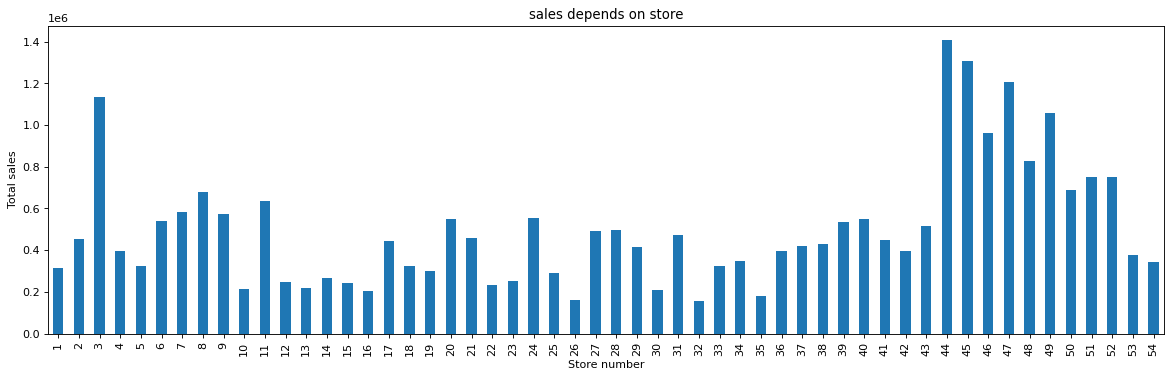

In [404]:
plt.figure(figsize=(18, 5), dpi= 80)

sales_city = Salesdf.groupby(['store_nbr'])['sales'].sum()
sales_city.plot.bar()
plt.title ("sales depends on store")
plt.xlabel('Store number')
plt.ylabel('Total sales')
plt.show()

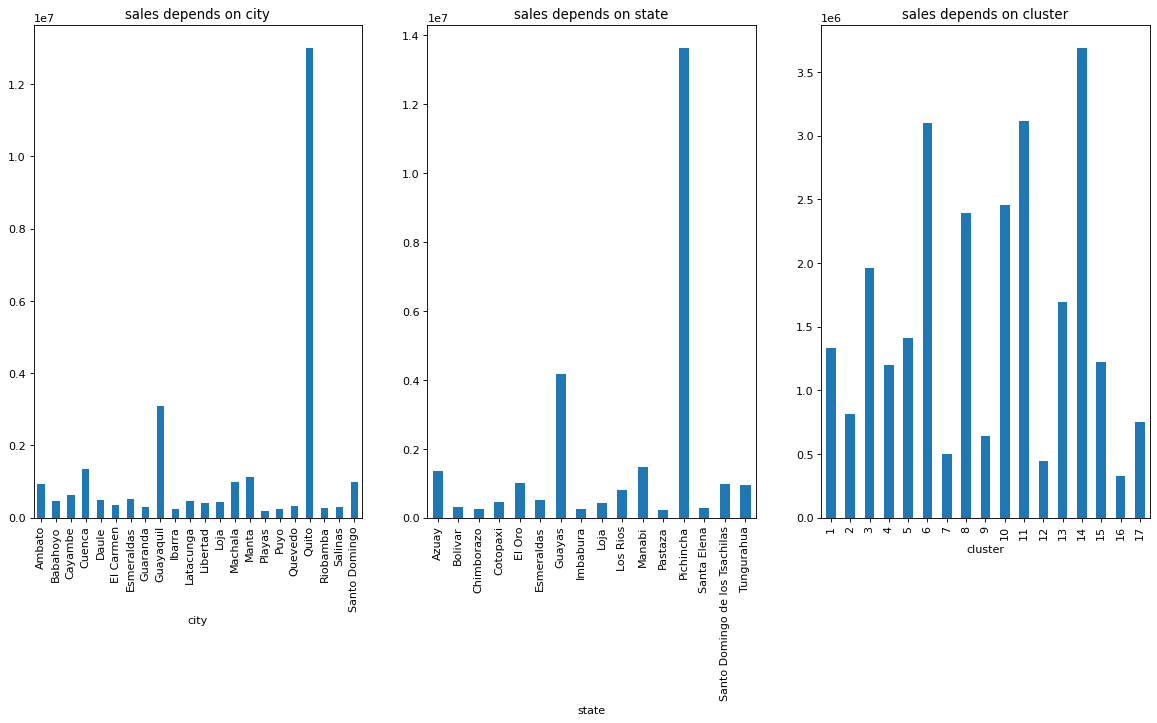

In [405]:
plt.figure(figsize=(18, 8), dpi= 80)

plt.subplot (1, 3, 1)
sales_city = Salesdf.groupby(['city'])['sales'].sum()
sales_city.plot.bar()
plt.title ("sales depends on city")

plt.subplot (1, 3, 2)
sales_state = Salesdf.groupby(['state'])['sales'].sum()
sales_state.plot.bar()
plt.title ("sales depends on state")

plt.subplot (1, 3, 3)
sales_cluster = Salesdf.groupby(['cluster'])['sales'].sum()
sales_cluster.plot.bar()
plt.title ("sales depends on cluster")

plt.show()

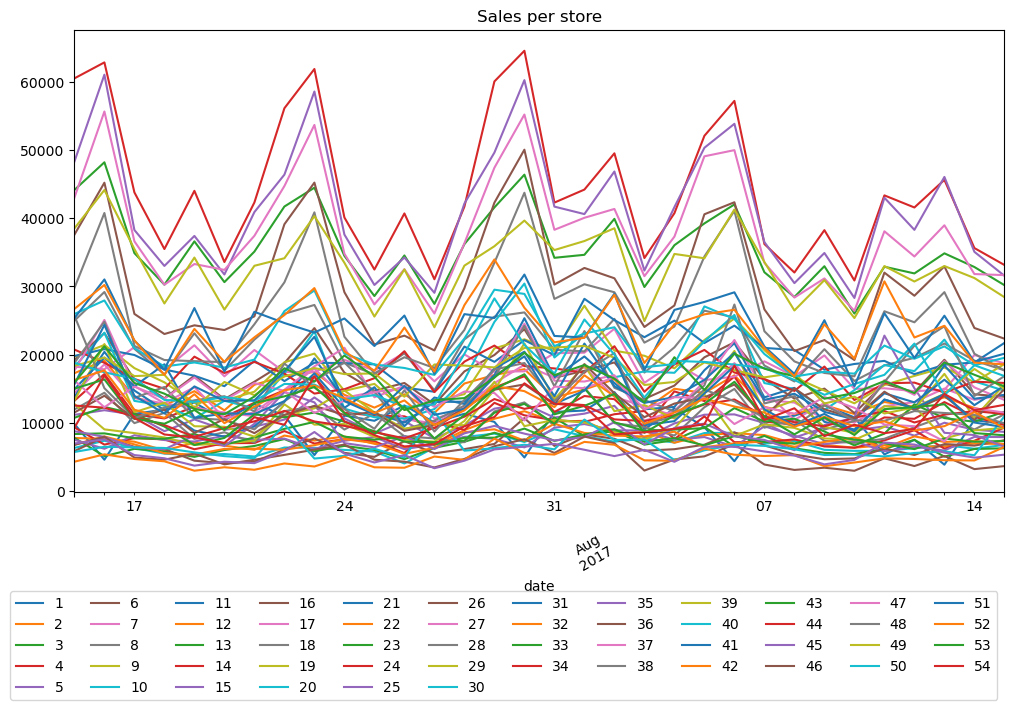

In [406]:
# Group the training data by date and store number, then sum the sales for each group
sale_store = Salesdf.groupby(["date", "store_nbr"]).sales.sum().reset_index()
sale_store = sale_store.pivot(index='date', columns='store_nbr', values='sales')

# Create a line plot of sales per store over time
sale_store.plot(figsize=(12, 6))
plt.title("Sales per store", fontsize=12)
plt.xticks(rotation=30)

# Display a legend for the stores on the right side, allowing multiple stores to be compared
plt.legend(bbox_to_anchor=(1, -.2), ncol=12)
plt.show()

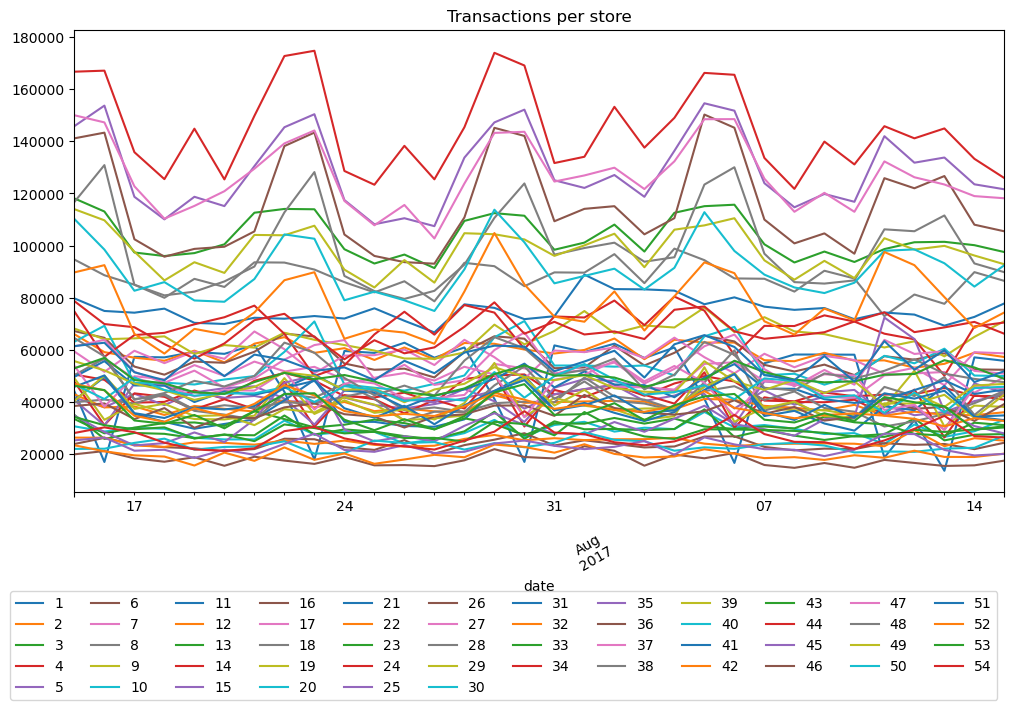

In [407]:
# Group the training data by date and store number, and sum the transactions for each group
tr_store = Salesdf.groupby(['date', 'store_nbr'], as_index=False)['transactions'].sum()
tr_store = tr_store.pivot(index='date', columns='store_nbr', values='transactions')

# Create a line plot of transactions per store over time
tr_store.plot(figsize=(12, 6))
plt.title("Transactions per store", fontsize=12)
plt.xticks(rotation=30)

# Add a legend for the stores on the right side, organized in 12 columns
plt.legend(bbox_to_anchor=(1, -.2), ncol=12)

# Show the plot
plt.show()

In [408]:
Salesdf = Salesdf.drop(['type_y','description', 'state', 'locale_name','locale','transferred','oil_normalized'], axis = 1)

In [409]:
Salesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57024 entries, 0 to 57023
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          57024 non-null  datetime64[ns]
 1   store_nbr     57024 non-null  int64         
 2   family        57024 non-null  object        
 3   sales         57024 non-null  float64       
 4   onpromotion   57024 non-null  int64         
 5   city          57024 non-null  object        
 6   type_x        57024 non-null  object        
 7   cluster       57024 non-null  int64         
 8   oil_price     57024 non-null  float64       
 9   transactions  57024 non-null  int64         
 10  day_of_week   57024 non-null  int32         
 11  day_of_year   57024 non-null  int32         
 12  day_of_month  57024 non-null  int32         
 13  year          57024 non-null  int32         
 14  month         57024 non-null  int32         
dtypes: datetime64[ns](1), float64(2), in

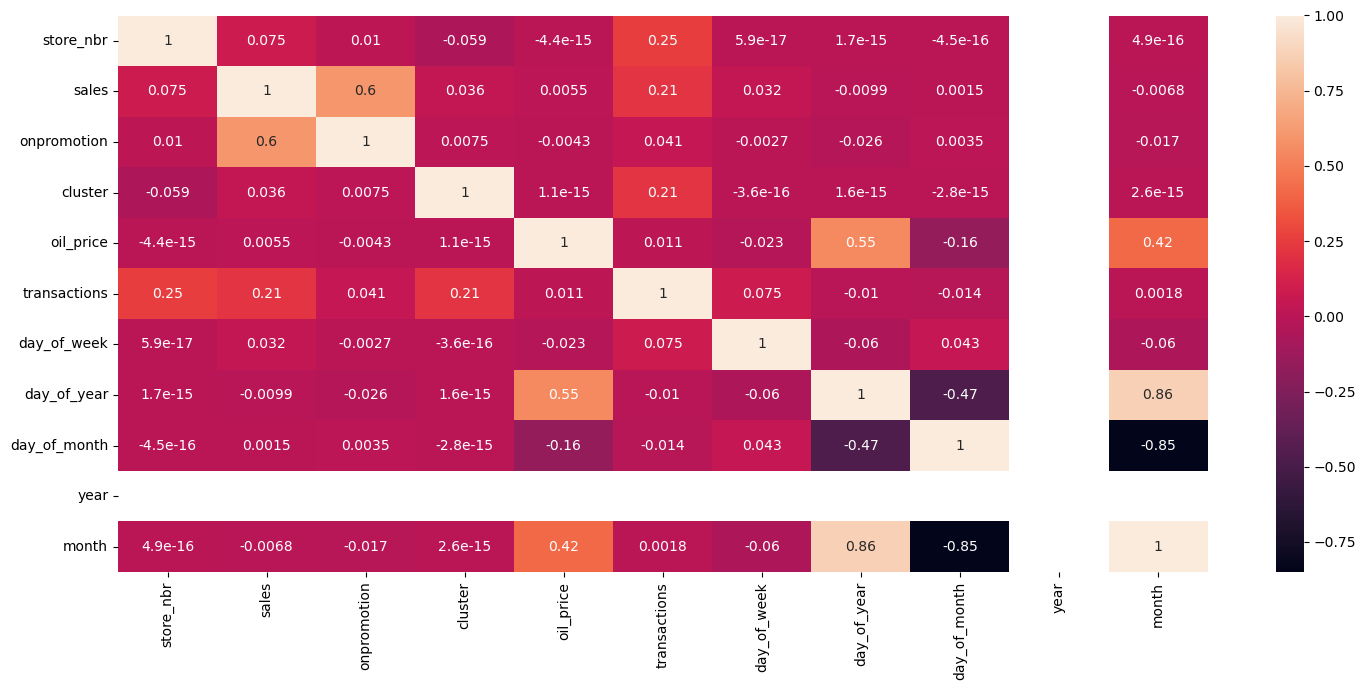

In [410]:
# Assuming you have a DataFrame named 'train' with numeric columns
numeric_columns = Salesdf.select_dtypes(include=['number'])

# Create a figure with a specified size
plt.figure(figsize=(15, 7))

# Create a heatmap of the correlation matrix with annotations
sns.heatmap(numeric_columns.corr(), annot=True)

# Adjust layout for better spacing
plt.tight_layout()

# Display the heatmap
plt.show()

In [411]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(Salesdf[["city","family",'type_x']])
Salesdf[["city","family",'type_x']] = enc.transform(Salesdf[["city","family",'type_x']])

In [412]:
#from sklearn.preprocessing import StandardScaler, MinMaxScaler
#scaler = MinMaxScaler()
#Salesdf[["city","family",'type_x']] = scaler.fit_transform(Salesdf[["city","family",'type_x']])

In [413]:
Salesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57024 entries, 0 to 57023
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          57024 non-null  datetime64[ns]
 1   store_nbr     57024 non-null  int64         
 2   family        57024 non-null  float64       
 3   sales         57024 non-null  float64       
 4   onpromotion   57024 non-null  int64         
 5   city          57024 non-null  float64       
 6   type_x        57024 non-null  float64       
 7   cluster       57024 non-null  int64         
 8   oil_price     57024 non-null  float64       
 9   transactions  57024 non-null  int64         
 10  day_of_week   57024 non-null  int32         
 11  day_of_year   57024 non-null  int32         
 12  day_of_month  57024 non-null  int32         
 13  year          57024 non-null  int32         
 14  month         57024 non-null  int32         
dtypes: datetime64[ns](1), float64(5), in

# Test Data

In [414]:
store_data_test['date'] = pd.to_datetime(store_data_test['date'], format = "%Y-%m-%d")
store_data_test_start = store_data_test.date.min().date()
store_data_test_end = store_data_test.date.max().date()

missing_dates_test = pd.date_range(store_data_test_start, store_data_test_end
                             ).difference(store_data_test.date.unique())
missing_dates_test = missing_dates_test.strftime("%Y-%m-%d").tolist()

missing_dates_test

[]

In [415]:
# Train-validation split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
train_data, val_data = train_test_split(Salesdf, test_size=0.2, random_state=42)

In [416]:
features = [
    'store_nbr',
    'onpromotion',
]

target = 'sales'

In [417]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(train_data[features], train_data[target])

RandomForestRegressor(random_state=42)

In [418]:
val_predictions = model.predict(val_data[features])
val_predictions

array([2326.52422323,  796.05063928,   59.68211376, ...,  101.75620063,
        989.13855631,  222.5901208 ])

In [419]:
from sklearn.metrics import mean_squared_log_error
rmsle = np.sqrt(mean_squared_log_error(val_data[target], val_predictions))
print(f"RMSLE: {rmsle}")

RMSLE: 2.023572161436881


In [420]:
test_predictions = model.predict(store_data_test[features])

In [421]:
submission = pd.DataFrame({'id': store_data_test['id'], 'sales': test_predictions})

In [422]:
submission.to_csv('submission.csv', index=False)